In [0]:
import torch
import random
import numpy as np

In [0]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [138]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [139]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data[:, :],
                                                   wine.target,
                                                   test_size=0.3,
                                                   shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [0]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_layers):
    super().__init__()
    self.fc1 = torch.nn.Linear(13, n_hidden_layers)
    self.act1 = torch.nn.LeakyReLU()
    self.fc2 = torch.nn.Linear(n_hidden_layers, n_hidden_layers*5)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_layers*5, n_hidden_layers)
    self.act3 = torch.nn.Sigmoid()
    self.fc4 = torch.nn.Linear(n_hidden_layers, 3)
    self.sm = torch.nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    x = self.act3(x)
    x = self.fc4(x)
    return x
  
  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x
  
wine_net = WineNet(10)

In [0]:
learning_rate = 0.001

optimizer = torch.optim.Adam(wine_net.parameters(), lr=learning_rate)

loss = torch.nn.CrossEntropyLoss()

In [162]:
np.random.permutation(5)

array([3, 0, 2, 1, 4])

In [0]:
def learning_step(net, optimizer, loss, X_train, y_train):
  optimizer.zero_grad()
  
  y_pred = net.forward(X_train)
  
  loss_value = loss(y_pred, y_train)
  loss_value.backward()
  
  optimizer.step()
  

In [0]:
def batch_learning_step(net, optimizer, loss, learning_step_function, X_train, y_train, batch_size):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    batch_indices = order[start_index: start_index+batch_size]
    
    X_batch = X_train[batch_indices]
    y_batch = y_train[batch_indices]
    
    learning_step_function(net, optimizer, loss, X_batch, y_batch)

In [156]:
batch_size = 10

metric_history = []

for n_epoch in range(5000):
  
  batch_learning_step(wine_net, optimizer, loss, learning_step, X_train, y_train, batch_size)
    
  if n_epoch % 100 == 0:
    test_pred = wine_net.forward(X_test)
    test_pred = test_pred.argmax(dim=1)
    metric_history.append(float((test_pred == y_test).float().mean())) 
    print(metric_history)

[0.31481480598449707]
[0.31481480598449707, 0.8148148059844971]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485, 0.9074074029922485]
[0.31481480598449707, 0.8148148059844971, 0.9074074029922485, 0.9074074029922485, 

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

In [59]:
n_classes = 3
plt_colors = ['g', 'orange', 'black']
plt_step = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1


xx, yy = torch.meshgrid(torch.arange(x_min, x_max, plt_step),
                    torch.arange(y_min, y_max, plt_step))

preds = wine_net.inference(torch.cat([xx.reshape(-1, 1), 
                                      yy.reshape(-1, 1)], dim=1))

pred_class = preds.data.numpy().argmax(axis=1)
pred_class = pred_class.reshape(xx.shape)
plt.contourf(xx, yy, pred_class, cmap='Accent')

for i, color in zip(range(n_classes), plt_colors):
  indices = np.where(y_train == i)
  plt.scatter(X_train[indices, 0],
              X_train[indices, 1], 
              c=color, 
              label=wine.target_names[i],
              cmap='Accent')
  
  plt.xlabel(wine.feature_names[0])
  plt.ylabel(wine.feature_names[1])
  plt.legend()


RuntimeError: ignored

In [0]:
metric_history = {}
learning_tate = 0.001

for n_hidden_neurons in range(1, 21):
  
  metric_history.update({str(n_hidden_neurons): {}})

  for batch_size in range(10, 190, 10):
    
    wine_net = WineNet(n_hidden_neurons)
  
    optimizer = torch.optim.Adam(wine_net.parameters(), lr=learning_rate)

    metric_history[str(n_hidden_neurons)].update({str(batch_size): []})

    for n_epoch in range(2000):

      batch_learning_step(wine_net, optimizer, loss, learning_step, X_train, y_train, batch_size)

      if n_epoch % 100 == 0:
        test_pred = wine_net.forward(X_test)
        test_pred = test_pred.argmax(dim=1)
        metric_history[str(n_hidden_neurons)][str(batch_size)].append((test_pred == y_test).float().mean())
#         print(metric_history[str(n_hidden_neurons)][str(batch_size)] )


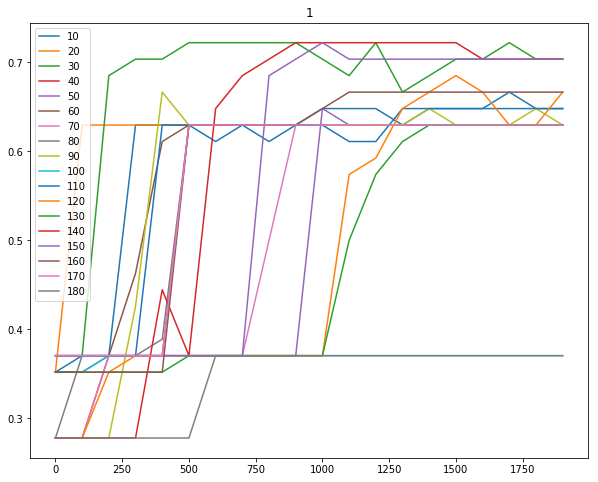

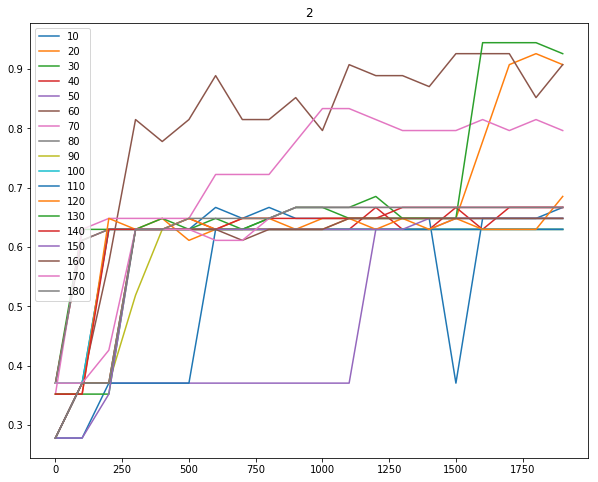

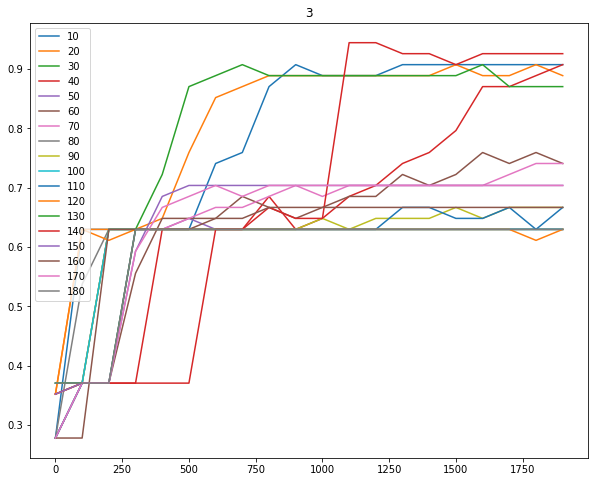

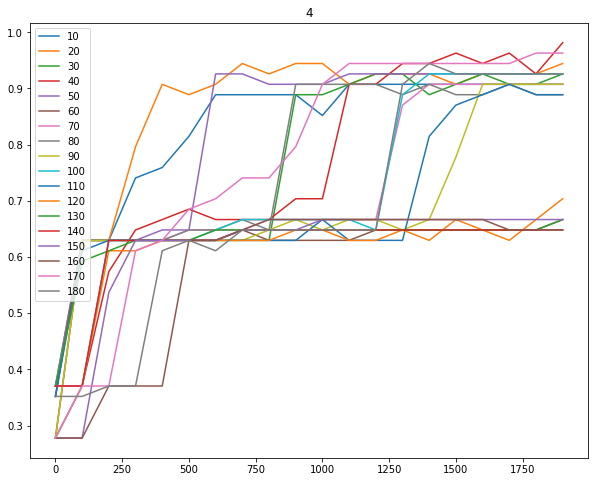

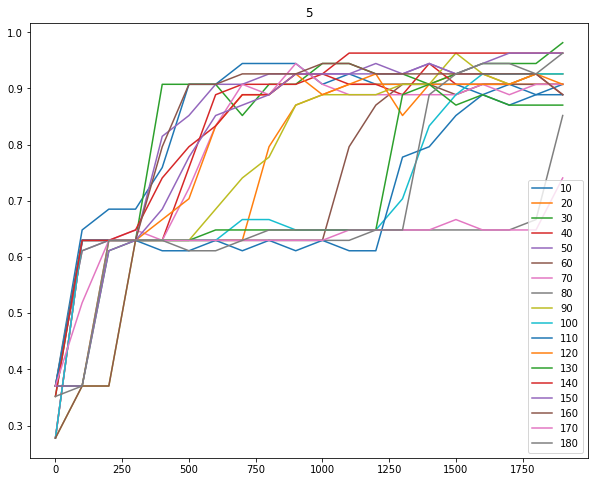

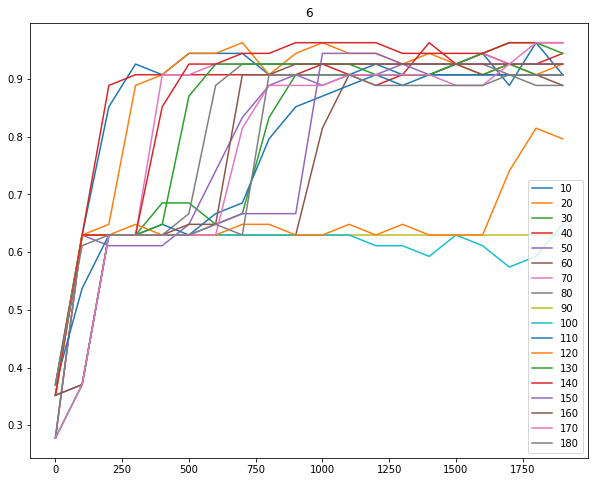

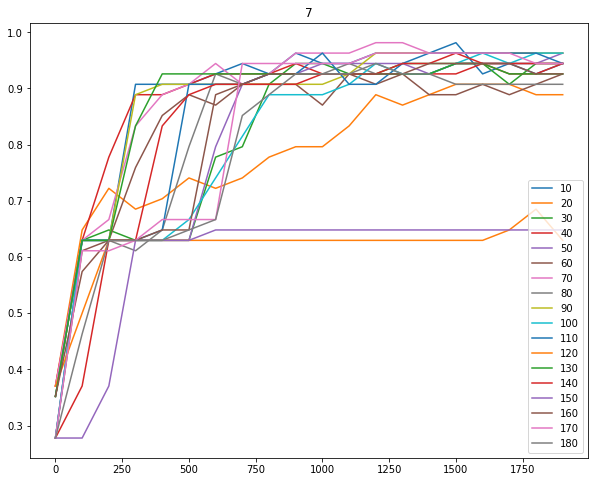

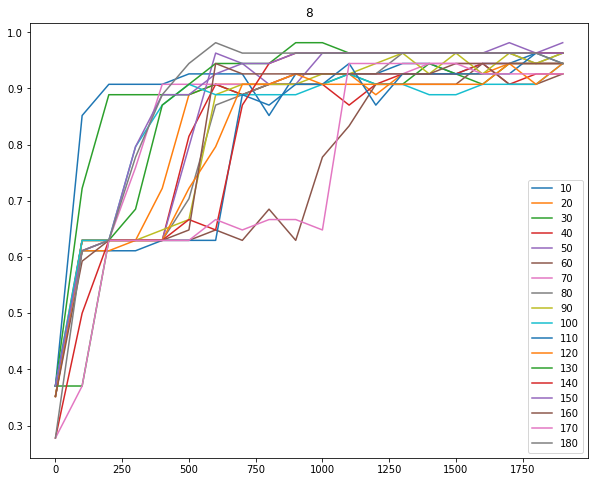

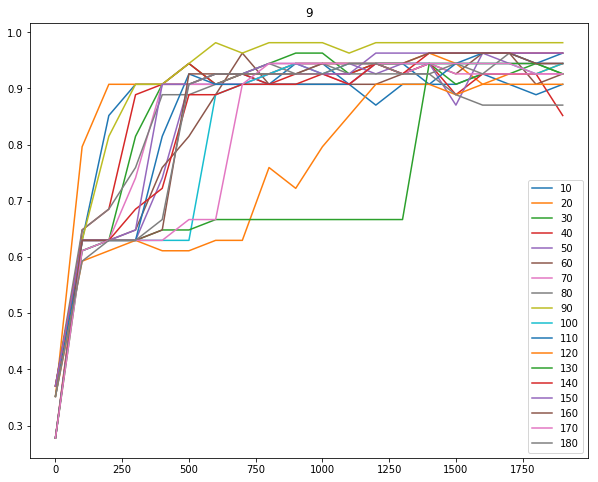

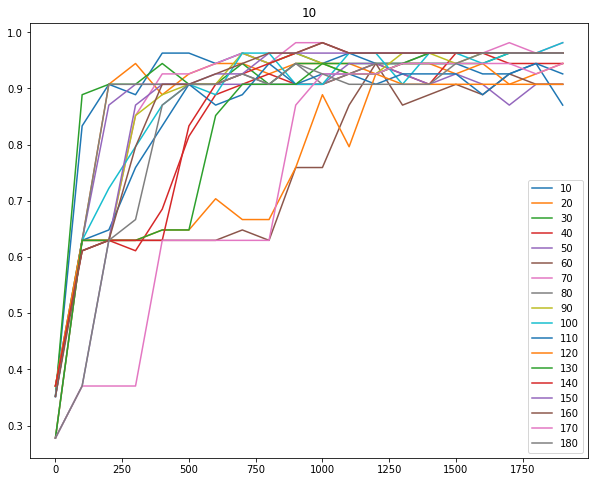

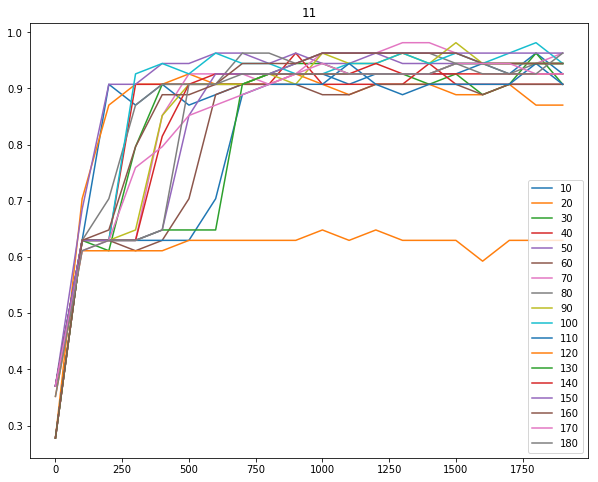

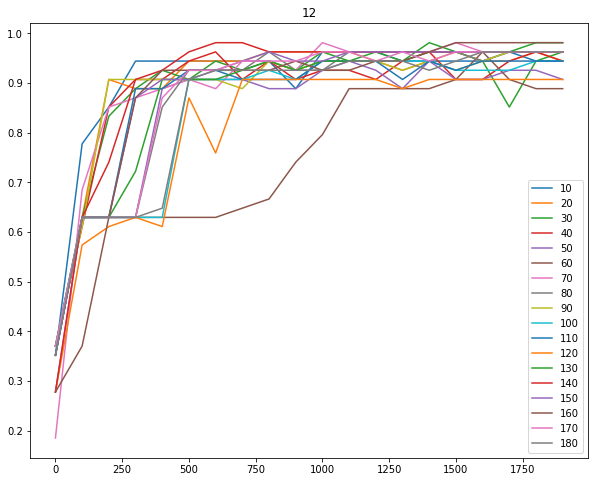

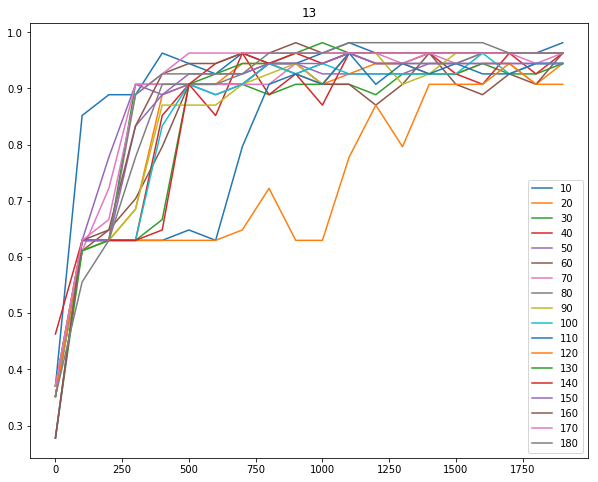

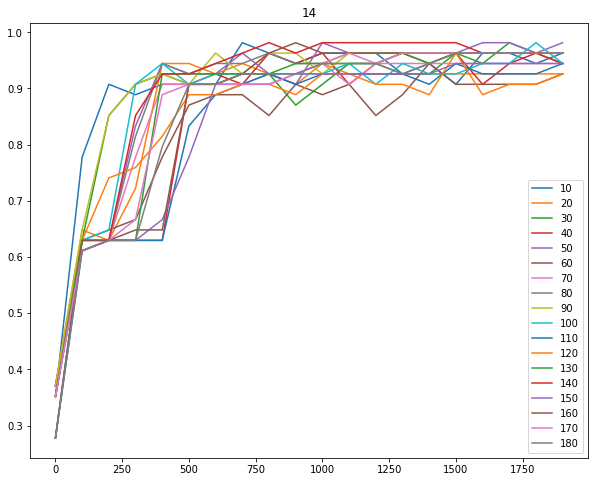

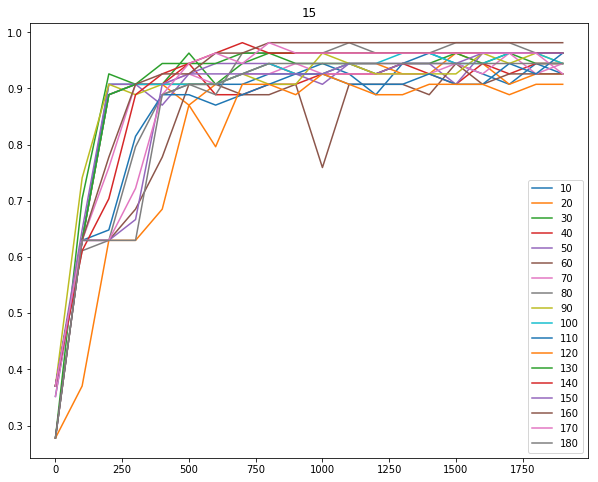

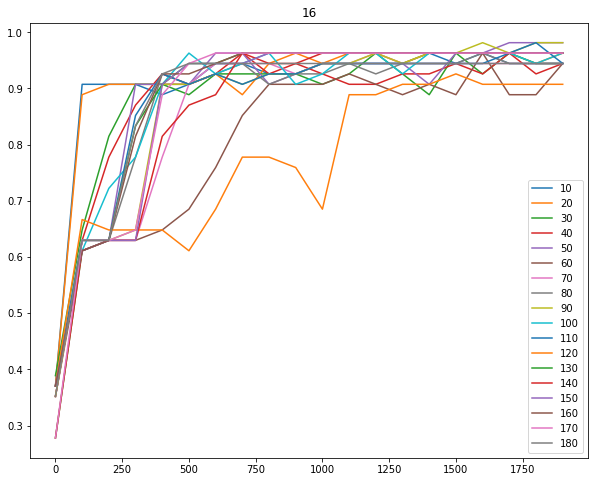

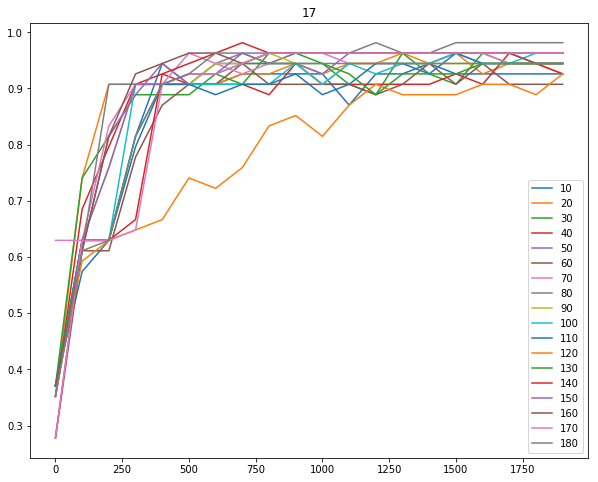

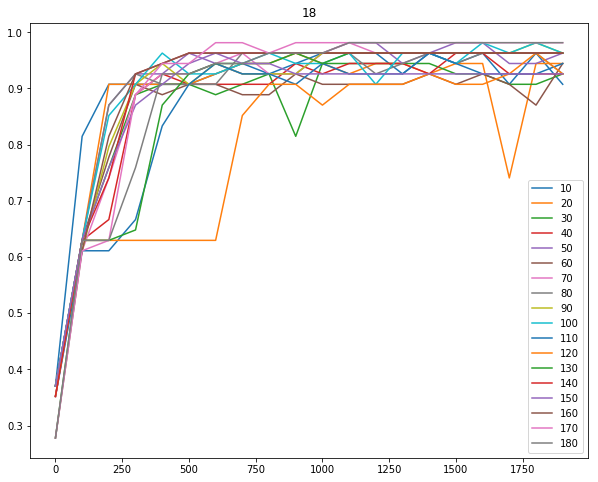

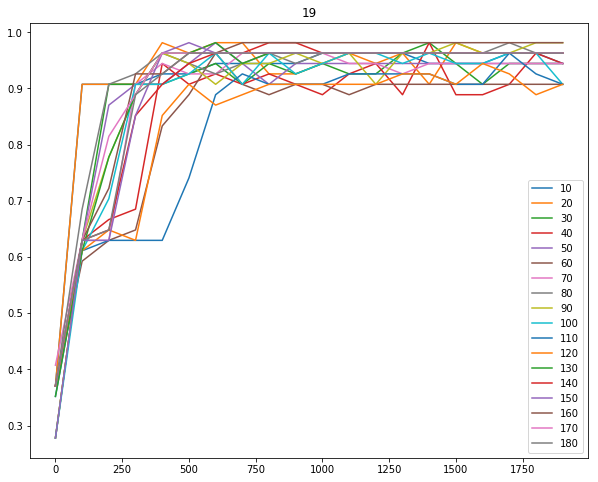

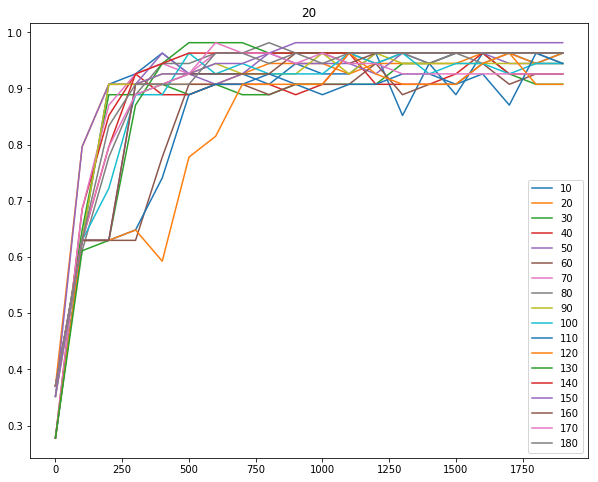

In [178]:
for n_hidden_neurons in metric_history:
  
  plt.figure()

  for batch_size in metric_history[str(n_hidden_neurons)]:
    
    plt.plot(range(0, 2000, 100), metric_history[str(n_hidden_neurons)][str(batch_size)])
    plt.title(str(n_hidden_neurons))
    plt.legend(range(10, 190, 10))
